In [1]:
import medmnist
import jax 
from jax import numpy as jnp
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
print(medmnist.__version__)

3.0.1


In [5]:
from medmnist import RetinaMNIST

In [6]:
retinaMNIST = np.load('/Users/francescoaldoventurelli/Downloads/retinamnist.npz')

In [7]:
type(retinaMNIST)

numpy.lib.npyio.NpzFile

In [8]:
print(retinaMNIST.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [9]:
train_set = retinaMNIST["train_images"]

In [10]:
train_set.shape

(1080, 28, 28, 3)

In [11]:
train_set_labels = retinaMNIST["train_labels"]
train_set_labels.shape

(1080, 1)

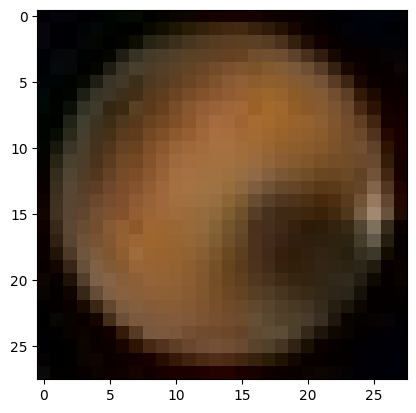

In [12]:
import matplotlib.pyplot as plt
plt.imshow(train_set[0].reshape((28,28,3)))
plt.show()

In [13]:
class ImageTransformation:
    def __init__(self, new_size: int) -> None:
        self.new_size = new_size
    
    def down_sample(self, image: np.ndarray) -> np.ndarray:
        new_image = tf.image.resize(image, (self.new_size, self.new_size))
        new_image = new_image / 255.0
        new_image = new_image.numpy()
        return new_image
    
    def to_gray_scale(self, image: np.ndarray) -> np.ndarray:
        image_grayscale = tf.image.rgb_to_grayscale(image)
        return image_grayscale.numpy()  # Convert to NumPy array
    
    def Iterator(self, train_set) -> np.ndarray:
        down_sampled_image_list = []
        image_list = []
        for image in train_set:
            down_sampled_image_list.append(self.down_sample(image))
        for image in down_sampled_image_list:
            image_list.append(self.to_gray_scale(image))
        return np.array(image_list, dtype="float32")


In [14]:
images = ImageTransformation(16)
Xtrain = images.Iterator(train_set)

In [15]:
Xtrain[2].shape

(16, 16, 1)

In [16]:
ytrain = train_set_labels
type(ytrain)

numpy.ndarray

In [17]:
ytrain

array([[0],
       [0],
       [0],
       ...,
       [2],
       [2],
       [3]], dtype=uint8)

In [18]:
print(ytrain.flatten())

[0 0 0 ... 2 2 3]


In [19]:
ytrain = ytrain.flatten()

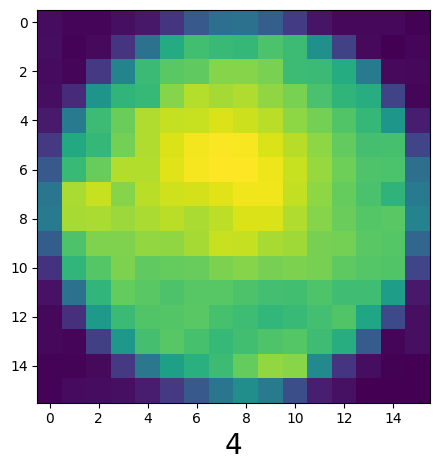

In [20]:
plt.imshow(Xtrain[10])
plt.xlabel(ytrain[10], fontsize=20)
plt.tight_layout()
plt.show()

In [21]:
set(ytrain)

{0, 1, 2, 3, 4}

In [22]:
ytrain

array([0, 0, 0, ..., 2, 2, 3], dtype=uint8)

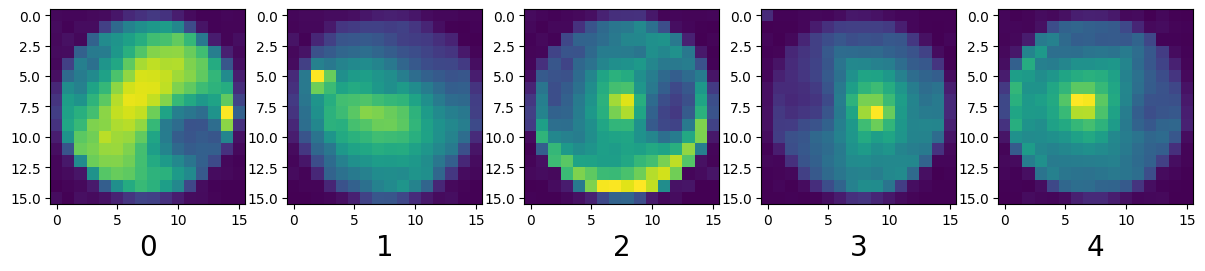

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(12,6))
classes_available = [j for j in range(5)]
for i in range(5):
    axs[i].imshow(Xtrain[ytrain == classes_available[i]][0])
    axs[i].set_xlabel(classes_available[i], fontsize=20)
plt.tight_layout()
plt.show()

In [24]:
Xtrain01 = Xtrain[(ytrain == 0) | (ytrain == 1)]
ytrain01 = ytrain[(ytrain == 0) | (ytrain == 1)]

In [25]:
print(ytrain01.flatten())

[0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1
 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
 1 1 0 1 0 1 0 0 0 1 0 0 

In [26]:
print("Number of class 0: ", np.count_nonzero(ytrain01 == 0))
print(" ")
print("Number of class 1: ", np.count_nonzero(ytrain01 == 1))

Number of class 0:  486
 
Number of class 1:  128


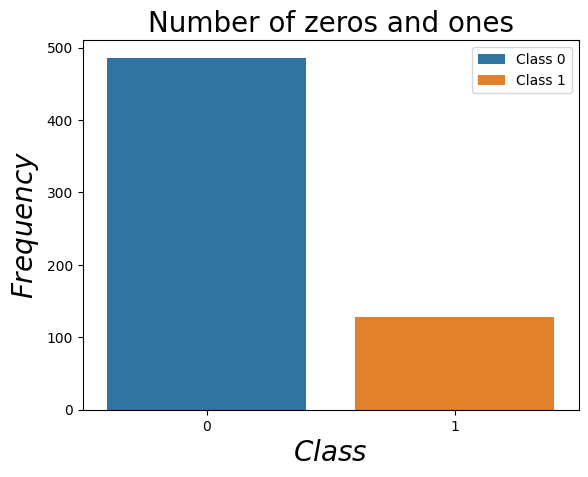

In [42]:
import seaborn as sns
count_zeros = np.count_nonzero(ytrain01 == 0)
count_ones = np.count_nonzero(ytrain01 == 1)
sns.barplot(x=["0", "1"], y=[count_zeros, count_ones], label=["Class 0", "Class 1"])
plt.legend()
plt.title(r"Number of zeros and ones", fontsize=20)
plt.xlabel(r"$Class$", fontsize=20)
plt.ylabel("$Frequency$", fontsize=20)
plt.show()

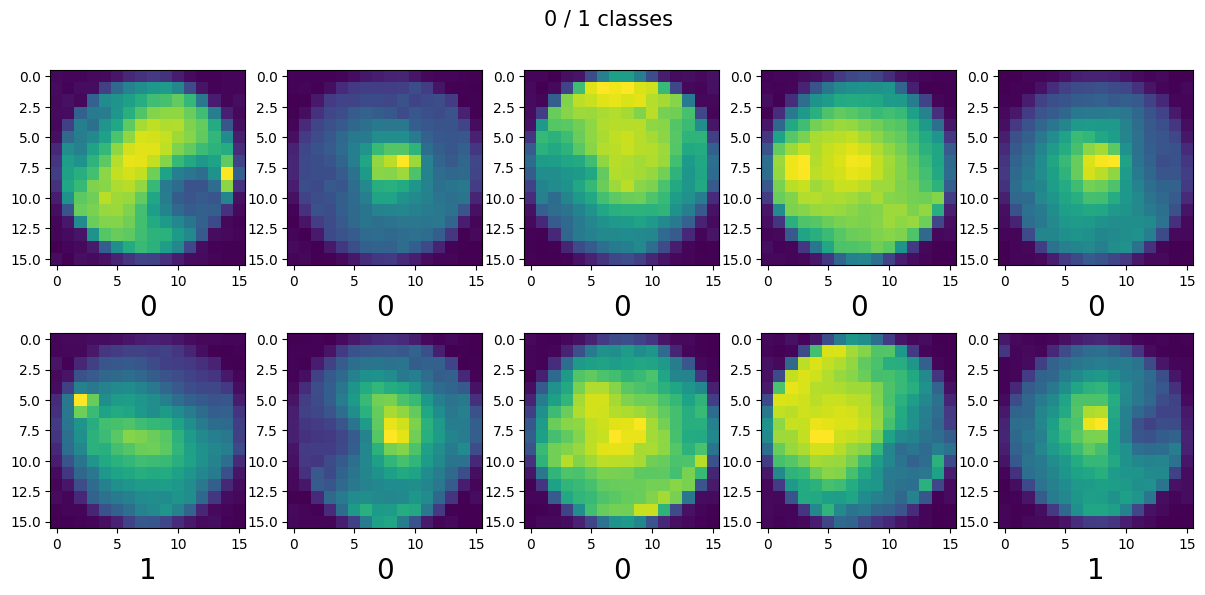

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12,6))
plt.suptitle("0 / 1 classes", fontsize=15)
for i in range(10):
    axs[i//5, i%5].imshow(Xtrain01[i]) 
    axs[i//5, i%5].set_xlabel(ytrain01[i], fontsize=20)
#plt.axis("off")
plt.tight_layout()
plt.show()

In [44]:
import optax
from sklearn.metrics import accuracy_score

In [45]:
Xtrain01 = jnp.asarray(Xtrain01)
ytrain01 = jnp.asarray(ytrain01)

In [46]:
import pennylane as qml
from sklearn.utils import gen_batches

In [47]:
Xtrain01.shape

(614, 16, 16, 1)

In [48]:
Xtrain01_flat = Xtrain01.reshape((Xtrain01.shape[0], -1))
Xtrain01_flat.shape

(614, 256)

In [49]:
type(Xtrain01_flat[0])

jaxlib.xla_extension.ArrayImpl

In [50]:
class quantum_nn:
    def __init__(self, n_wires: int) -> None:
        self.n_wires = n_wires
    def feature_map(self, X):
        wires = 8
        idx = 0
        layers = 11
        for layer in range(layers):
            for i in range(wires):
                qml.Rot(phi=X[idx + 0], theta=X[idx + 1], omega=X[idx + 2], wires=i) # 24 total features here
                idx += 3
    def pqc(self, weights):
        wires = 8
        idx = 0
        layers = 3
        for layer in range(layers):
            for i in range(wires):
                qml.Rot(phi=weights[idx + 0], theta=weights[idx + 1], omega=weights[idx + 2], wires=i)
                idx += 3
        qml.Barrier(only_visual=True)
        for j in range(wires - 1):
            qml.CRot(phi=weights[idx + 0], theta=weights[idx + 1], omega=weights[idx + 2], wires=[j, j + 1])
            idx += 3
        qml.Barrier(only_visual=True)
        for layer in range(layers):
            for k in range(wires):
                qml.Rot(phi=weights[idx + 0], theta=weights[idx + 1], omega=weights[idx + 2], wires=k)
                idx += 3

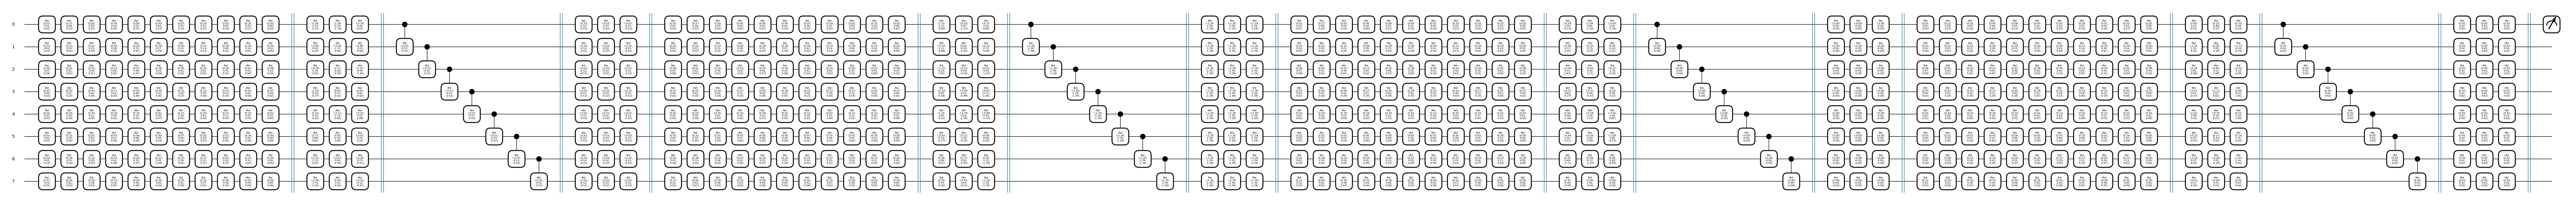

In [51]:
device = qml.device('default.qubit', wires=8)
@qml.qnode(device=device, interface="jax")
def qnn_circuit(X, weight):
    model = quantum_nn(n_wires=8)
    for k in range(lys):
        f_map = model.feature_map(X)
        qml.Barrier(only_visual=True)
        p_qc = model.pqc(weight[:, k])
        qml.Barrier(only_visual=True)
    return qml.probs(wires=0)

key = jax.random.PRNGKey(777)
param_per_gate = 3
n_qubits = 8
entangling_gate = 7
lys = 4
initial_params = jax.random.normal(key, shape=((param_per_gate * n_qubits + param_per_gate * entangling_gate +
                                                    param_per_gate * n_qubits), lys))
qml.draw_mpl(qnode=qnn_circuit, decimals=2)(Xtrain01_flat[0], initial_params)
plt.show()

In [52]:
len(initial_params.flatten())

276

In [53]:
len(ytrain01)

614

In [54]:
w0 = len(ytrain01) / (2 * jnp.sum(ytrain01 == 0))
w0 = float(w0)
w0

0.6316872239112854

In [56]:
w1 = len(ytrain01) / (2*jnp.sum(ytrain01 == 1))
w1 = float(w1)
w1

2.3984375

In [197]:
w0 = 0.63
w1 = 2.40

@jax.jit
def weighted_crossentropy(x, y, theta):
    labels = jnp.array(y)
    pred = jnp.array(qnn(x, theta))
    loss = 0
    for l, p in zip(labels, pred):
        loss += w1 * l * (jnp.log(p[l])) + w0 * (1 - l) * jnp.log(1 - p[1 - l])
    return -jnp.sum(loss)/len(labels)

@jax.jit
def accuracy(x, y, theta):
    labels = jnp.array(y)
    pred = jnp.array(qnn(x, theta))
    correct_predictions = jnp.sum(jnp.argmax(pred, axis=1) == labels)
    return correct_predictions / len(labels)

def train_accuracy(x, y, theta):
    accuracy = jnp.mean(jnp.argmax(qnn(x, theta), -1) == y)
    return accuracy

In [192]:
@jax.jit
def accuracy(X, y, params):
    labels = jnp.array(y)
    predictions = jnp.array(qnn(X, params))
    correct_predictions = jnp.sum(jnp.argmax(predictions, axis=1) == labels)
    return correct_predictions / len(labels)

@jax.jit
def binary_crossentropy(x, y, theta):
    labels = jnp.array(y)
    pred = jnp.array(qnn(x, theta))
    loss = 0
    for l, p in zip(labels, pred):
        loss += l* (jnp.log(p[l])) + (1 - l) * jnp.log(1 - p[1 - l])
    return -jnp.sum(loss) / len(labels)


In [198]:
@jax.jit
def optimizer_update(opt_state, params, x, y):
    loss_value, grads = jax.value_and_grad(lambda theta: weighted_crossentropy(x, y, theta))(params)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss_value

In [229]:
qnn_batched = jax.vmap(qnn_circuit, (0, None,))
qnn = jax.jit(qnn_batched)
optimizer = optax.adam(learning_rate=0.005)

In [234]:
key = jax.random.PRNGKey(721)
initial_params = jax.random.normal(key, shape=((param_per_gate * n_qubits + param_per_gate * entangling_gate +
                                                param_per_gate * n_qubits), lys))
key = jax.random.split(key)[0]
params = jnp.copy(initial_params)
opt_state = optimizer.init(initial_params)

costs, accs = [], []
train_cost_epochs, train_acc_epochs = [], []

n_epochs = 100
batch_size = 32
for epoch in range(1,n_epochs+1):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(Xtrain01_flat.shape[0]))), shape=(Xtrain01_flat.shape[0],),replace=False)
    key = jax.random.split(key)[0]
    for i in gen_batches(Xtrain01_flat.shape[0], batch_size):
        idxs = idxs_dataset[i]
        params, opt_state, cost = optimizer_update(opt_state, params, Xtrain01_flat[idxs, :], ytrain01[idxs])
        '''params, opt_state, cost = optimizer_update(opt_state, params, X_train, y_train)'''
        cost = weighted_crossentropy(Xtrain01_flat, ytrain01, params,)
        costs.append(cost)
        train_acc = accuracy(Xtrain01_flat, ytrain01, params,)
        accs.append(train_acc)
    
    train_cost_epochs.append(cost)
    train_acc_epochs.append(train_acc)
    print(f"Epoch: {epoch}, ---Train loss: ", cost, "---Train acc: ", train_acc)
    optimal_params = params  # Optimal parameters after training
    #path = "/Users/francescoaldoventurelli/Desktop/"
    #np.save(path + "trained_weight_file_1layer.npy", optimal_params)

Epoch: 1, ---Train loss:  0.7056755 ---Train acc:  0.48371335504886
Epoch: 2, ---Train loss:  0.681539 ---Train acc:  0.5635179153094463
Epoch: 3, ---Train loss:  0.67059404 ---Train acc:  0.6140065146579805
Epoch: 4, ---Train loss:  0.66557425 ---Train acc:  0.5700325732899023
Epoch: 5, ---Train loss:  0.6627554 ---Train acc:  0.5716612377850163
Epoch: 6, ---Train loss:  0.6595393 ---Train acc:  0.6074918566775245
Epoch: 7, ---Train loss:  0.65360546 ---Train acc:  0.5749185667752443
Epoch: 8, ---Train loss:  0.6543132 ---Train acc:  0.5504885993485342
Epoch: 9, ---Train loss:  0.6510436 ---Train acc:  0.5814332247557004
Epoch: 10, ---Train loss:  0.64810145 ---Train acc:  0.5749185667752443
Epoch: 11, ---Train loss:  0.6472231 ---Train acc:  0.5863192182410424
Epoch: 12, ---Train loss:  0.6483021 ---Train acc:  0.5863192182410424
Epoch: 13, ---Train loss:  0.6476725 ---Train acc:  0.5977198697068404
Epoch: 14, ---Train loss:  0.64448273 ---Train acc:  0.5895765472312704
Epoch: 15, --

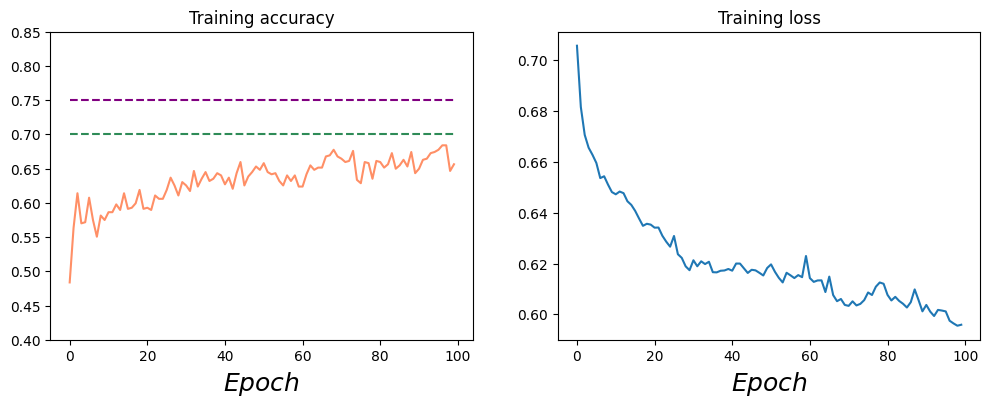

In [235]:
y75 = 0.75*np.ones(len(train_acc_epochs))
y70 = 0.7*np.ones(len(train_acc_epochs))

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(train_acc_epochs, color='orangered', alpha=0.6)
axs[0].plot(y75, color='purple', ls='--')
axs[0].plot(y70, color='seagreen', ls='--')
axs[1].plot(train_cost_epochs, color='tab:blue')
axs[0].set_xlabel(r"$Epoch$", fontsize=18)
axs[1].set_xlabel(r"$Epoch$", fontsize=18)
axs[0].set_title('Training accuracy')
axs[0].set_ylim(0.4,0.85)
axs[1].set_title('Training loss')
plt.show()

In [236]:
test_set = retinaMNIST["test_images"]
test_labels = retinaMNIST["test_labels"]
ytest = test_labels.flatten()
images = ImageTransformation(16)
Xtest = images.Iterator(test_set)
Xtest01 = Xtest[(ytest == 0) | (ytest == 1)]
ytest01 = ytest[(ytest == 0) | (ytest == 1)]

Xtest01 = jnp.asarray(Xtest01)
ytest01 = jnp.asarray(ytest01)

Xtest01_flat = Xtest01.reshape((Xtest01.shape[0], -1))

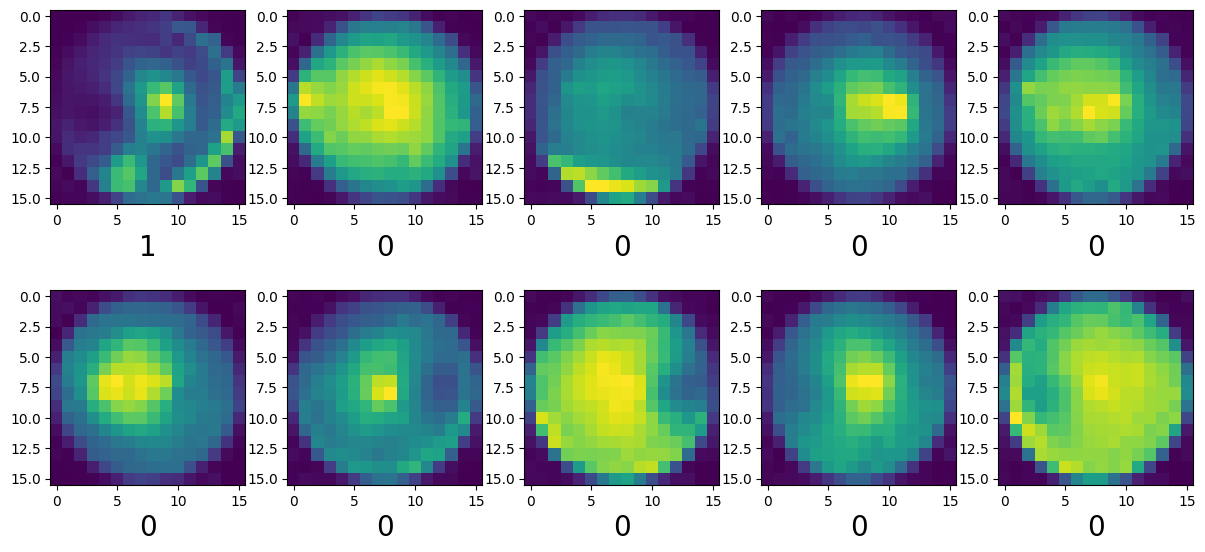

In [237]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(12,6))
for i in range(10):
    axs[i//5, i%5].imshow(Xtest01[i]) 
    axs[i//5, i%5].set_xlabel(ytest01[i], fontsize=20)
#plt.axis("off")
plt.tight_layout()

In [238]:
print("Number of TEST class 0: ", np.count_nonzero(ytest01 == 0))
print(" ")
print("Number of TEST class 1: ", np.count_nonzero(ytest01 == 1))

Number of TEST class 0:  174
 
Number of TEST class 1:  46


In [239]:
count_zeros_TEST = np.count_nonzero(ytest01==0)
count_ones_TEST = np.count_nonzero(ytest01==1)

In [75]:
len(Xtest01_flat)

220

In [240]:
preds = qnn(Xtest01_flat, optimal_params)

In [241]:
preds

Array([[0.3354185 , 0.6645796 ],
       [0.63346213, 0.3665345 ],
       [0.38797814, 0.6120193 ],
       [0.43401307, 0.56598794],
       [0.7087902 , 0.29120886],
       [0.33121723, 0.66878164],
       [0.50178766, 0.4982099 ],
       [0.64713216, 0.3528677 ],
       [0.4645244 , 0.5354768 ],
       [0.31857282, 0.68142676],
       [0.19153385, 0.80846703],
       [0.33620986, 0.6637882 ],
       [0.62798387, 0.37201798],
       [0.3708067 , 0.6291935 ],
       [0.5512566 , 0.44874048],
       [0.6227304 , 0.377269  ],
       [0.5449267 , 0.45507273],
       [0.42871708, 0.5712814 ],
       [0.6831168 , 0.3168823 ],
       [0.5169425 , 0.48305368],
       [0.7385357 , 0.26146725],
       [0.7425942 , 0.25740525],
       [0.73953927, 0.2604622 ],
       [0.6819163 , 0.31808197],
       [0.33459628, 0.6654045 ],
       [0.59608823, 0.4039097 ],
       [0.50667906, 0.49331754],
       [0.74380416, 0.25619665],
       [0.5871279 , 0.4128742 ],
       [0.33299577, 0.66700155],
       [0.

In [242]:
jnp.argmax(preds, axis=1)

Array([1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0],      dtype=int64)

In [243]:
estimated_labels = jnp.array([jnp.argmax(label) for label in preds])

In [244]:
np.count_nonzero(estimated_labels == 0)

128

In [245]:
np.count_nonzero(estimated_labels == 1)

92

In [246]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix

In [247]:
test_accuracy = accuracy_score(ytest01, estimated_labels)

In [248]:
test_accuracy

0.5909090909090909

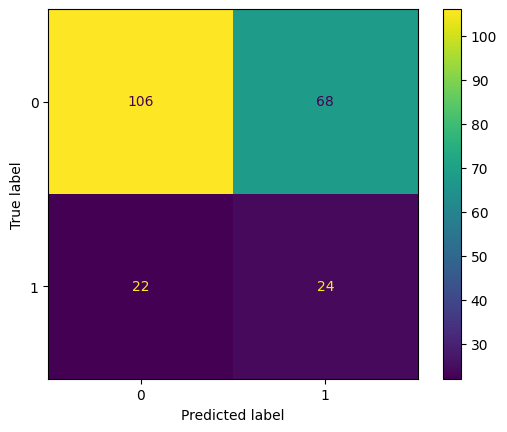

In [249]:
ConfusionMatrixDisplay(confusion_matrix(ytest01, estimated_labels)).plot()

In [250]:
from sklearn.metrics import f1_score
f1_score(ytest01, estimated_labels)

0.3478260869565218

## Create the validation set

In [214]:
print(retinaMNIST.files)

['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


In [215]:
val_set = retinaMNIST["val_images"]
val_labels = retinaMNIST["val_labels"]
yval = val_labels.flatten()
images = ImageTransformation(16)
Xval = images.Iterator(val_set)
Xval01 = Xval[(yval == 0) | (yval == 1)]
yval01 = yval[(yval == 0) | (yval == 1)]

Xval01 = jnp.asarray(Xval01)
yval01 = jnp.asarray(yval01)

Xval01_flat = Xval01.reshape((Xval01.shape[0], -1))

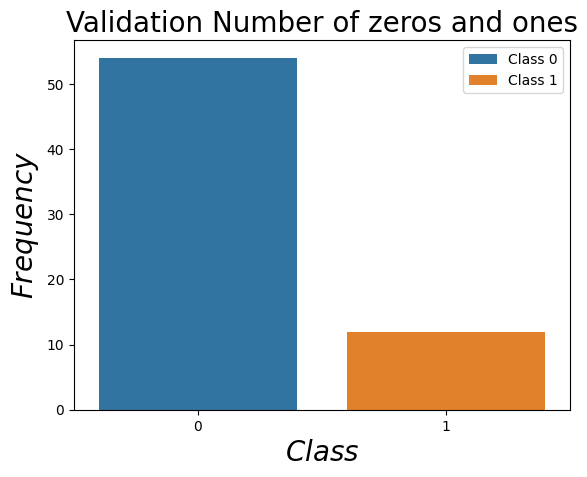

In [216]:
count_zeros_v = np.count_nonzero(yval01 == 0)
count_ones_v = np.count_nonzero(yval01 == 1)

sns.barplot(x=["0", "1"], y=[count_zeros_v, count_ones_v], label=["Class 0", "Class 1"])
plt.legend()
plt.title(r"Validation Number of zeros and ones", fontsize=20)
plt.xlabel(r"$Class$", fontsize=20)
plt.ylabel("$Frequency$", fontsize=20)
plt.show()

In [251]:
qnn_batched = jax.vmap(qnn_circuit, (0, None,))
qnn = jax.jit(qnn_batched)
optimizer = optax.adam(learning_rate=0.005) # Modify the learning rate

key = jax.random.PRNGKey(29)
initial_params = jax.random.normal(key, shape=((param_per_gate * n_qubits + param_per_gate * entangling_gate +
                                                param_per_gate * n_qubits), lys))
key = jax.random.split(key)[0]
params = jnp.copy(initial_params)
opt_state = optimizer.init(initial_params)
costs, val_costs, accs, val_accs = [], [], [], []
train_cost_epochs, val_cost_epochs, train_acc_epochs, val_acc_epochs = [], [], [], []

n_epochs = 100
batch_size = 32  # Modify the batch size
for epoch in range(1,n_epochs+1):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(Xtrain01_flat.shape[0]))), shape=(Xtrain01_flat.shape[0],),replace=False)
    key = jax.random.split(key)[0]
    for i in gen_batches(Xtrain01_flat.shape[0], batch_size):
        idxs = idxs_dataset[i]
        params, opt_state, cost = optimizer_update(opt_state, params, Xtrain01_flat[idxs, :], ytrain01[idxs])
        cost = (weighted_crossentropy(Xtrain01_flat, ytrain01, params,))
        val_cost = (weighted_crossentropy(Xval01_flat, yval01, params,))
        costs.append(cost)
        val_costs.append(val_cost)
        train_acc = accuracy(Xtrain01_flat, ytrain01, params,)
        val_acc = accuracy(Xval01_flat, yval01, params,)
        accs.append(train_acc)
        val_accs.append(val_acc)
    train_cost_epochs.append(cost)
    val_cost_epochs.append(val_cost)
    train_acc_epochs.append(train_acc)
    val_acc_epochs.append(val_acc)
    print(f"Epoch: {epoch}, ---Train loss: ", cost, "---Val loss: ", val_cost,
          "---Train acc: ", train_acc, "---Val acc: ", val_acc)
    optimal_params = params  # Optimal parameters after training
    #path = "/Users/francescoaldoventurelli/Desktop/"
    #np.save(path + "trained_weight_file_1layer.npy", optimal_params)

Epoch: 1, ---Train loss:  0.7412598 ---Val loss:  0.6962469 ---Train acc:  0.4446254071661238 ---Val acc:  0.48484848484848486
Epoch: 2, ---Train loss:  0.70227545 ---Val loss:  0.6733453 ---Train acc:  0.511400651465798 ---Val acc:  0.4696969696969697
Epoch: 3, ---Train loss:  0.6874023 ---Val loss:  0.67226535 ---Train acc:  0.5488599348534202 ---Val acc:  0.5151515151515151
Epoch: 4, ---Train loss:  0.68497235 ---Val loss:  0.6732291 ---Train acc:  0.5684039087947883 ---Val acc:  0.6212121212121212
Epoch: 5, ---Train loss:  0.68092906 ---Val loss:  0.67549974 ---Train acc:  0.5863192182410424 ---Val acc:  0.5757575757575758
Epoch: 6, ---Train loss:  0.6796992 ---Val loss:  0.6785189 ---Train acc:  0.5700325732899023 ---Val acc:  0.5151515151515151
Epoch: 7, ---Train loss:  0.67647386 ---Val loss:  0.68215954 ---Train acc:  0.5635179153094463 ---Val acc:  0.5606060606060607
Epoch: 8, ---Train loss:  0.67542654 ---Val loss:  0.6765138 ---Train acc:  0.5635179153094463 ---Val acc:  0.5

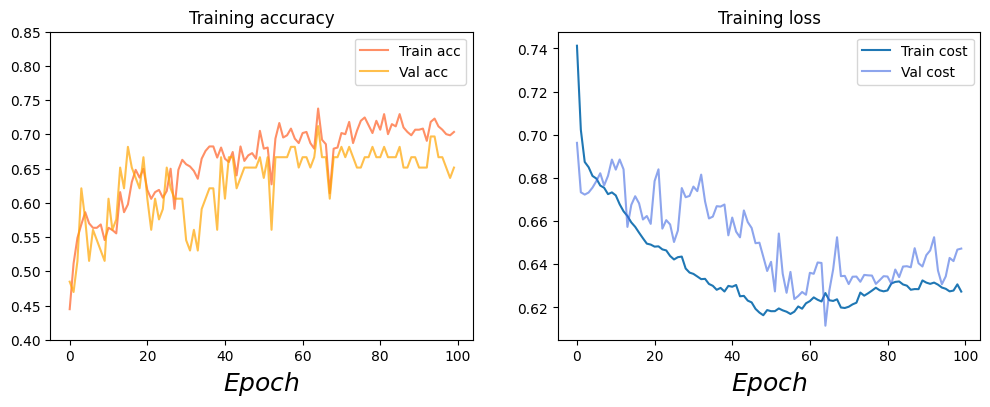

In [252]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(train_acc_epochs, color='orangered', alpha=0.6, label='Train acc')
axs[0].plot(val_acc_epochs, color='orange', alpha=0.7, label='Val acc')
axs[1].plot(train_cost_epochs, color='tab:blue', label='Train cost')
axs[1].plot(val_cost_epochs, color='royalblue', label='Val cost', alpha=0.6)
axs[0].set_xlabel(r"$Epoch$", fontsize=18)
axs[1].set_xlabel(r"$Epoch$", fontsize=18)
axs[0].set_title('Training accuracy')
axs[0].set_ylim(0.4,0.85)
axs[1].set_title('Training loss')
axs[0].legend()
axs[1].legend()
plt.show()

In [253]:
preds = qnn(Xtest01_flat, optimal_params)

In [254]:
preds

Array([[0.3387686 , 0.66122985],
       [0.7515315 , 0.248465  ],
       [0.65244126, 0.34755585],
       [0.2835466 , 0.7164542 ],
       [0.57547486, 0.4245248 ],
       [0.4149085 , 0.58509076],
       [0.6412339 , 0.3587639 ],
       [0.6830616 , 0.31693855],
       [0.59766436, 0.40233693],
       [0.41411692, 0.5858825 ],
       [0.34774762, 0.65225405],
       [0.5352763 , 0.4647218 ],
       [0.6152397 , 0.38476267],
       [0.35578454, 0.6442159 ],
       [0.5362864 , 0.46371135],
       [0.5979797 , 0.4020197 ],
       [0.620092  , 0.37990728],
       [0.68415993, 0.31583828],
       [0.5821905 , 0.4178092 ],
       [0.63569015, 0.3643056 ],
       [0.7304023 , 0.26960057],
       [0.6475288 , 0.35247028],
       [0.6245909 , 0.37541068],
       [0.61662084, 0.3833773 ],
       [0.44220805, 0.557793  ],
       [0.5419186 , 0.45807883],
       [0.4425424 , 0.55745435],
       [0.69173723, 0.3082636 ],
       [0.65648067, 0.34352186],
       [0.38508585, 0.6149113 ],
       [0.

In [255]:
estimated_labels = jnp.array([jnp.argmax(label) for label in preds])

In [256]:
estimated_labels

Array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],      dtype=int64)

In [257]:
np.count_nonzero(estimated_labels == 0)

151

In [258]:
test_accuracy = accuracy_score(ytest01, estimated_labels)

In [259]:
test_accuracy

0.6681818181818182

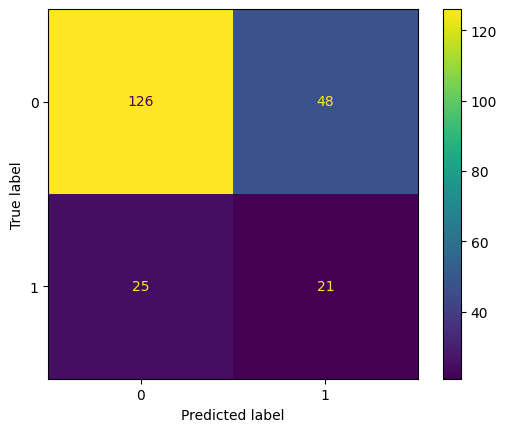

In [260]:
ConfusionMatrixDisplay(confusion_matrix(ytest01, estimated_labels)).plot()
plt.show()

In [261]:
f1_score(ytest01, estimated_labels)

0.36521739130434777

## Modify the learning rate 

In [228]:
qnn_batched = jax.vmap(qnn_circuit, (0, None,))
qnn = jax.jit(qnn_batched)
optimizer = optax.adam(learning_rate=0.001)
#optimizer = optax.adam(learning_rate=0.004) # Modify the learning rate

key = jax.random.PRNGKey(52)
initial_params = jax.random.normal(key, shape=((param_per_gate * n_qubits + param_per_gate * entangling_gate +
                                                param_per_gate * n_qubits), lys))
key = jax.random.split(key)[0]
params = jnp.copy(initial_params)
opt_state = optimizer.init(initial_params)

train_cost_epochs, val_cost_epochs, train_acc_epochs, val_acc_epochs = [], [], [], []

n_epochs = 300
batch_size = 32  # Modify the batch size
for epoch in range(1,n_epochs+1):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(Xtrain01_flat.shape[0]))), shape=(Xtrain01_flat.shape[0],),replace=False)
    key = jax.random.split(key)[0]
    for i in gen_batches(Xtrain01_flat.shape[0], batch_size):
        idxs = idxs_dataset[i]
        params, opt_state, cost = optimizer_update(opt_state, params, Xtrain01_flat[idxs, :], ytrain01[idxs])
    cost = weighted_crossentropy(Xtrain01_flat, ytrain01, params,)
    val_cost = weighted_crossentropy(Xval01_flat, yval01, params,)
    train_cost_epochs.append(cost)
    val_cost_epochs.append(val_cost)
    train_acc = accuracy(Xtrain01_flat, ytrain01, params,)
    val_acc = accuracy(Xval01_flat, yval01, params,)
    train_acc_epochs.append(train_acc)
    val_acc_epochs.append(val_acc)
    print(f"Epoch: {epoch}, ---Train loss: ", cost, "---Val loss: ", val_cost,
          "---Train acc: ", train_acc, "---Val acc: ", val_acc)
    optimal_params = params  # Optimal parameters after training
    #path = "/Users/francescoaldoventurelli/Desktop/"
    #np.save(path + "trained_weight_file_1layer.npy", optimal_params)

Epoch: 1, ---Train loss:  0.73124206 ---Val loss:  0.72406054 ---Train acc:  0.47719869706840395 ---Val acc:  0.5151515151515151
Epoch: 2, ---Train loss:  0.709859 ---Val loss:  0.683845 ---Train acc:  0.5325732899022801 ---Val acc:  0.6515151515151515
Epoch: 3, ---Train loss:  0.6985662 ---Val loss:  0.6810028 ---Train acc:  0.5195439739413681 ---Val acc:  0.6212121212121212
Epoch: 4, ---Train loss:  0.6855736 ---Val loss:  0.6681899 ---Train acc:  0.5488599348534202 ---Val acc:  0.6212121212121212
Epoch: 5, ---Train loss:  0.67440903 ---Val loss:  0.66585994 ---Train acc:  0.511400651465798 ---Val acc:  0.5151515151515151
Epoch: 6, ---Train loss:  0.660269 ---Val loss:  0.6496739 ---Train acc:  0.5472312703583062 ---Val acc:  0.5606060606060607
Epoch: 7, ---Train loss:  0.6506114 ---Val loss:  0.6437623 ---Train acc:  0.5798045602605864 ---Val acc:  0.6363636363636364
Epoch: 8, ---Train loss:  0.6434828 ---Val loss:  0.63045245 ---Train acc:  0.5732899022801303 ---Val acc:  0.5909090

KeyboardInterrupt: 

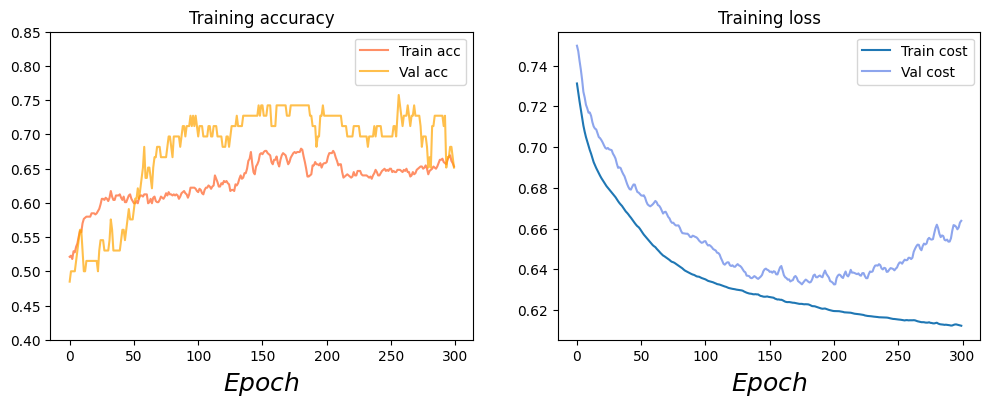

In [109]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(train_acc_epochs, color='orangered', alpha=0.6, label='Train acc')
axs[0].plot(val_acc_epochs, color='orange', alpha=0.7, label='Val acc')
axs[1].plot(train_cost_epochs, color='tab:blue', label='Train cost')
axs[1].plot(val_cost_epochs, color='royalblue', label='Val cost', alpha=0.6)
axs[0].set_xlabel(r"$Epoch$", fontsize=18)
axs[1].set_xlabel(r"$Epoch$", fontsize=18)
axs[0].set_title('Training accuracy')
axs[0].set_ylim(0.4,0.85)
axs[1].set_title('Training loss')
axs[0].legend()
axs[1].legend()
plt.show()

In [110]:
preds = qnn(Xtest01_flat, optimal_params)

In [111]:
preds

Array([[0.39617833, 0.6038184 ],
       [0.7363726 , 0.26362285],
       [0.545867  , 0.45412928],
       [0.4977896 , 0.50221056],
       [0.63604015, 0.3639581 ],
       [0.3791547 , 0.6208435 ],
       [0.6830904 , 0.31690663],
       [0.4760438 , 0.52395564],
       [0.63575745, 0.36424252],
       [0.56965196, 0.43034643],
       [0.25312552, 0.7468747 ],
       [0.47177893, 0.52821785],
       [0.5834952 , 0.416506  ],
       [0.31537545, 0.6846239 ],
       [0.5629218 , 0.43707427],
       [0.55361485, 0.446384  ],
       [0.6262282 , 0.3737703 ],
       [0.5752316 , 0.42476547],
       [0.5978273 , 0.4021709 ],
       [0.4713113 , 0.52868384],
       [0.67389214, 0.32610947],
       [0.46357402, 0.5364243 ],
       [0.53486204, 0.46513844],
       [0.69956833, 0.30042884],
       [0.34275264, 0.6572472 ],
       [0.51566124, 0.48433506],
       [0.54317874, 0.45681673],
       [0.74181086, 0.25818902],
       [0.683045  , 0.31695652],
       [0.3589986 , 0.6409973 ],
       [0.

In [112]:
estimated_labels2 = jnp.array([jnp.argmax(label) for label in preds])

In [113]:
estimated_labels == estimated_labels2

Array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [114]:
test_accuracy = accuracy_score(ytest01, estimated_labels2)
test_accuracy

0.6272727272727273

# Let's try QCNN

In [263]:
dev = qml.device("default.qubit", wires=8)

In [264]:
def quantum_kernel(params: np.ndarray, wires: list):
    wires_length = len(wires)
    x = 0
    for i in range(0, wires_length, 1):
        qml.Rot(phi=params[x+0], theta=params[x+1], omega=params[x+2], wires=[wires[i]])
        x += 3

params = np.random.rand(6)

@qml.qnode(dev)
def circuit(params: np.ndarray, wires: list):
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[2], wires[3]])
    return qml.probs(wires=0)

def Ising(type: str, control: int, target: int, weights: np.ndarray, weight_index: int) -> None:
    if type == 'XX':
        qml.CNOT(wires=[control, target])
        qml.RX(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])
    elif type == 'YY':
        qml.CNOT(wires=[control, target])
        qml.RY(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])
    elif type == 'ZZ':
        qml.CNOT(wires=[control, target])
        qml.RZ(phi=weights[weight_index],wires=target)
        qml.CNOT(wires=[control, target])
        
def pooling(wire_to_measure: int, weights: np.ndarray, weight_index: list) -> None:
    m_outcome = qml.measure(wire_to_measure)
    qml.cond(m_outcome, qml.Rot)(weights[weight_index[0]], weights[weight_index[1]], weights[weight_index[2]], wire_to_measure+1)

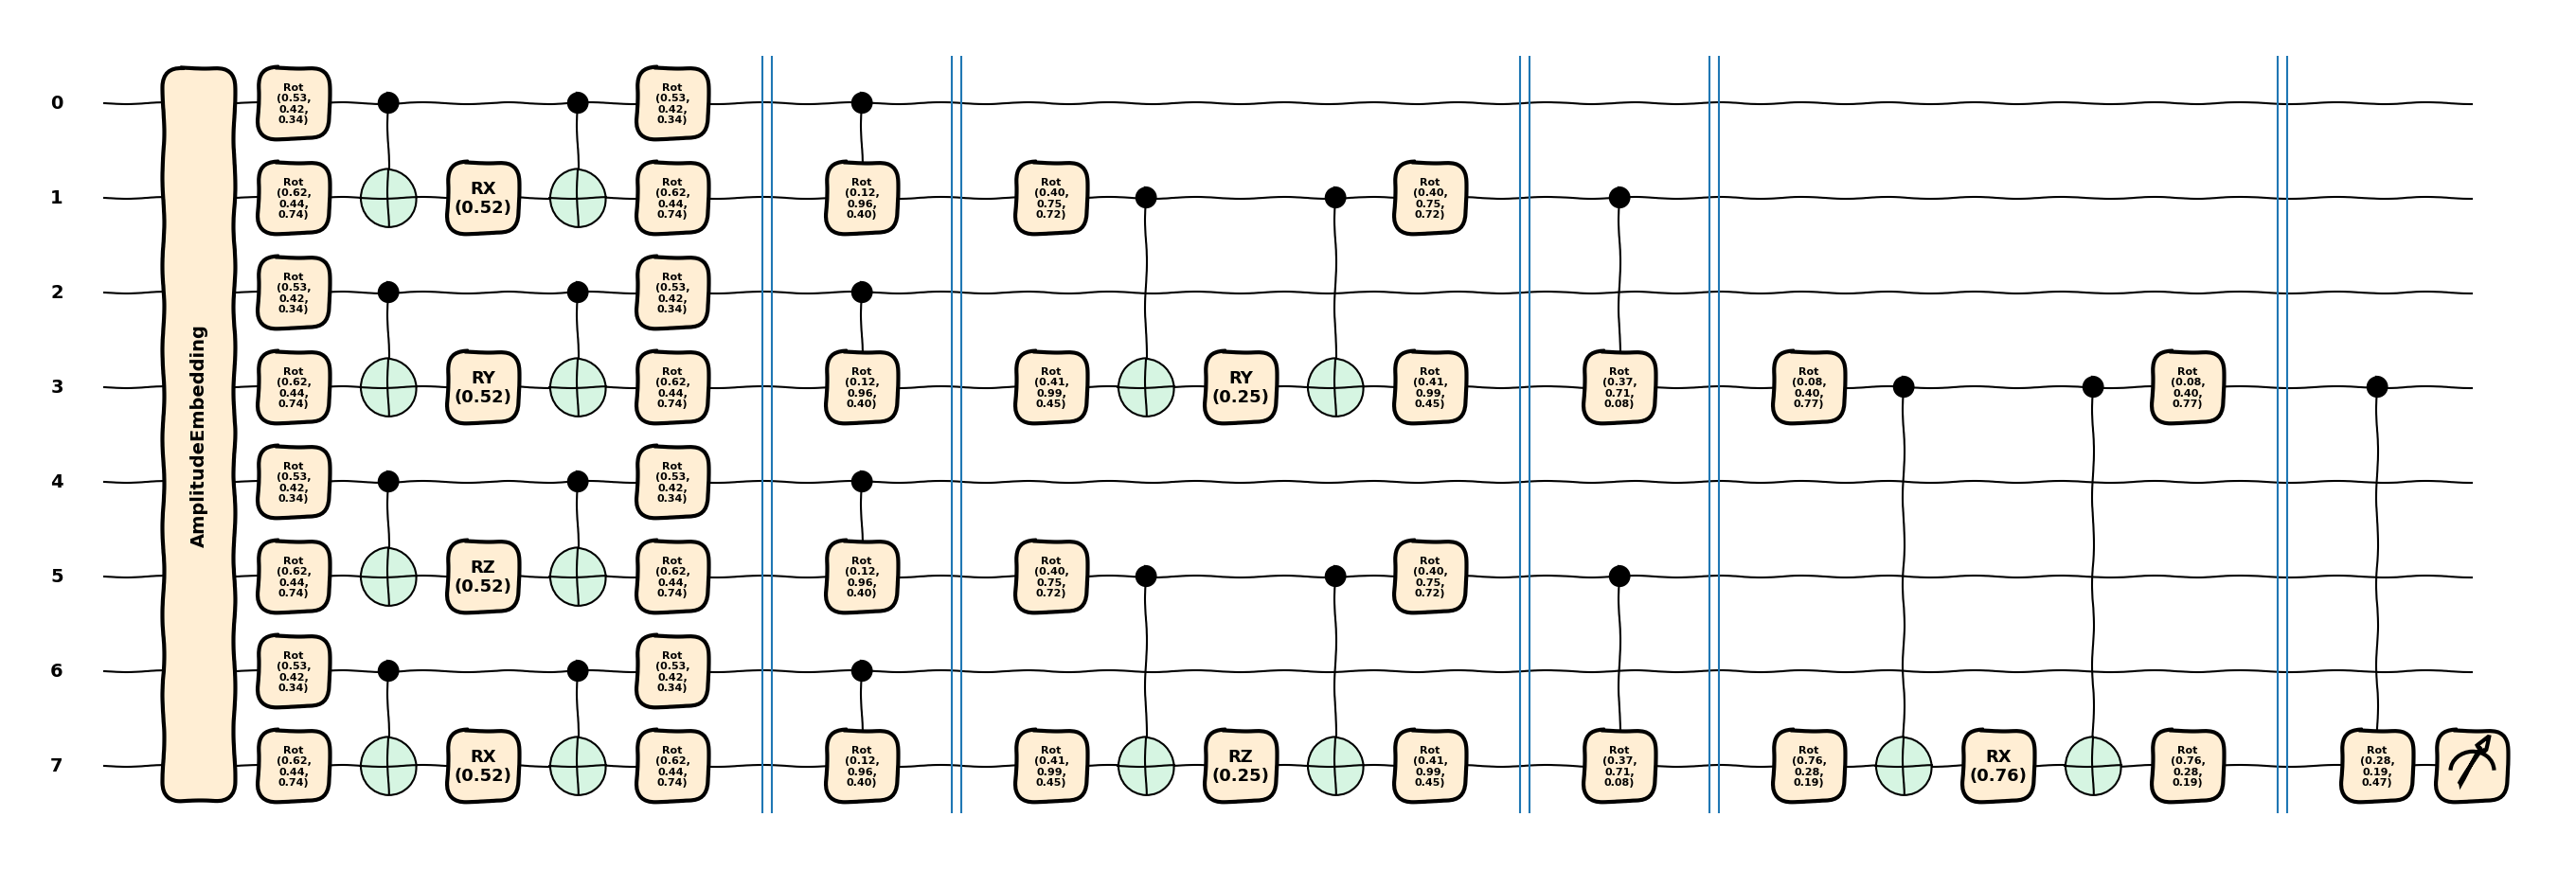

In [265]:
params = np.random.rand(48)
wires = [0,1,2,3,4,5,6,7]
num_wires = len(wires)
@qml.qnode(dev)
def circuit(params: np.ndarray, X):
    qml.AmplitudeEmbedding(features=X, wires=wires, pad_with=0.5)
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[4], wires[5]])
    quantum_kernel(params, wires=[wires[6], wires[7]])
    Ising(type='XX', control=wires[0], target=wires[1], weights=params, weight_index=6)
    quantum_kernel(params, wires=[wires[0], wires[1]])
    quantum_kernel(params, wires=[wires[2], wires[3]])
    Ising(type='YY', control=wires[2], target=wires[3], weights=params, weight_index=6)
    Ising(type='ZZ', control=wires[4], target=wires[5], weights=params, weight_index=6)
    Ising(type='XX', control=wires[6], target=wires[7], weights=params, weight_index=6)
    quantum_kernel(params, wires=[wires[2], wires[3]])
    quantum_kernel(params, wires=[wires[4], wires[5]])
    quantum_kernel(params, wires=[wires[6], wires[7]])
    qml.Barrier(only_visual=True)
    m_outcome1 = qml.measure(wires[0])
    m_outcome2 = qml.measure(wires[2])
    m_outcome3 = qml.measure(wires[4])
    m_outcome4 = qml.measure(wires[6])
    qml.cond(m_outcome1, qml.Rot)(params[20], params[21], params[22], wires[1])
    qml.cond(m_outcome2, qml.Rot)(params[20], params[21], params[22], wires[3])
    qml.cond(m_outcome3, qml.Rot)(params[20], params[21], params[22], wires[5])
    qml.cond(m_outcome4, qml.Rot)(params[20], params[21], params[22], wires[7])
    qml.Barrier(only_visual=True)
    quantum_kernel(params[33:], wires=[1,3])
    quantum_kernel(params[33:], wires=[5,7])
    Ising(type='YY', control=wires[1], target=wires[3], weights=params, weight_index=32)
    Ising(type='ZZ', control=wires[5], target=wires[7], weights=params, weight_index=32)
    quantum_kernel(params[33:], wires=[1,3])
    quantum_kernel(params[33:], wires=[5,7])
    qml.Barrier(only_visual=True)
    m_outcome5 = qml.measure(wires[1])
    m_outcome6 = qml.measure(wires[5])
    qml.cond(m_outcome5, qml.Rot)(params[39], params[40], params[41], wires[3])
    qml.cond(m_outcome6, qml.Rot)(params[39], params[40], params[41], wires[7])
    qml.Barrier(only_visual=True)
    quantum_kernel(params[41:], wires=[3,7])
    Ising(type='XX', control=wires[3], target=wires[7], weights=params, weight_index=44)
    quantum_kernel(params[41:], wires=[3,7])
    qml.Barrier(only_visual=True)
    m_outcome7 = qml.measure(wires[3])
    qml.cond(m_outcome7, qml.Rot)(params[45], params[46], params[47], wires[7])
    return qml.probs(wires=7)

qml.draw_mpl(qnode=circuit, style="sketch", decimals=2)(params, np.random.rand(2 ** 8))
plt.show()

In [266]:
jax.config.update('jax_platform_name', 'cpu')
jax.config.update("jax_enable_x64", True)

In [ ]:
qnn_batched = jax.vmap(qnn_circuit, (0, None,))
qnn = jax.jit(qnn_batched)

In [267]:
@jax.jit
def compute_out(weights, features, labels):
    """Computes the output of the corresponding label in the qcnn"""
    cost = lambda weights, feature, label: circuit(weights, feature)
    return jax.vmap(cost, in_axes=(None, 0, 0), out_axes=0)(
        weights, features, labels
    )
@jax.jit
def catecross(weights, features, labels):
    labels = jnp.array(labels)
    loss = 0
    out = jnp.array(compute_out(weights, features, labels))
    for l, p in zip(labels, out):
        loss += l * (jnp.log(p[l])) + (1 - l) * jnp.log(1 - p[1 - l])
    return -1 * jnp.sum(loss)/len(labels)

@jax.jit
def weighted_crossentropy(weights, features, labels):
    labels = jnp.array(labels)
    loss = 0
    out = jnp.array(compute_out(weights, features, labels))
    for l, p in zip(labels, out):
        loss += w1 * l * (jnp.log(p[l])) + w0 * (1 - l) * jnp.log(1 - p[1 - l])
    return -jnp.sum(loss)/len(labels)

@jax.jit
def accuracy(weights, features, labels):
    labels = jnp.array(labels)
    predictions = jnp.array(compute_out(weights, features, labels))
    correct_predictions = jnp.sum(jnp.argmax(predictions, axis=1) == labels)
    return correct_predictions / len(labels)

In [273]:
def optimizer_update(opt_state, params, features, labels):
    loss_value, grads = jax.value_and_grad(lambda theta: weighted_crossentropy(weights, features, labels))(params)
    updates, opt_state = optimizer.update(grads, opt_state)
    params = optax.apply_updates(params, updates)
    return params, opt_state, loss_value

In [277]:
@jax.jit
def loss_fn(weights, features, labels):
    return weighted_crossentropy(weights, features, labels)

# Inside the loop

In [120]:
from sklearn.utils import gen_batches

In [272]:
circuit(initial_params, Xtrain01_flat[20])

Array([0.54596663, 0.4540334 ], dtype=float64)

In [121]:
from jax import value_and_grad

In [280]:
n_epochs = 100
seed = 68

key = jax.random.PRNGKey(seed)
initial_params = jax.random.normal(key, shape=(48,))
np.random.seed(9)
weights = jnp.copy((initial_params))
batch_size = 32
# learning rate 
optimizer = optax.adam(learning_rate=0.01)
opt_state = optimizer.init(initial_params)
train_cost_epochs, train_acc_epochs = [], []
costs, accs = [], []
for step in range(n_epochs):
    idxs_dataset = jax.random.choice(key, jnp.array(list(range(Xtrain01_flat.shape[0]))), shape=(Xtrain01_flat.shape[0],), replace=False)
    key = jax.random.split(key)[0]
    for i in gen_batches(Xtrain01_flat.shape[0], batch_size):
        idxs = idxs_dataset[i]
        #train_cost, grad_circuit = jax.value_and_grad(loss_fn)(weights, Xtrain01_flat[idxs, :], ytrain01[idxs])
        #train_cost, grad_circuit = value_and_grad(weights, Xtrain01_flat[idxs, :], ytrain01[idxs])
        '''weights, opt_state, cost = optimizer_update(opt_state, weights, Xtrain01_flat[idxs, :], ytrain01[idxs])
        cost = weighted_crossentropy(weights, Xtrain01_flat, ytrain01)
        costs.append(cost)
        train_acc = accuracy(weights,Xtrain01_flat, ytrain01)
        accs.append(train_acc)'''
        '''params, opt_state, cost = optimizer_update(opt_state, params, X_train, y_train)'''
        train_cost, grad_circuit = value_and_grad(loss_fn)(weights, Xtrain01_flat[idxs, :], ytrain01[idxs])
        updates, opt_state = optimizer.update(grad_circuit, opt_state)
        weights = optax.apply_updates(weights, updates)
        cost = weighted_crossentropy(weights, Xtrain01_flat, ytrain01)
        train_acc = accuracy(weights,Xtrain01_flat, ytrain01)
    # Training step with (adam) optimizer
    #train_cost, grad_circuit = value_and_grad(weights, X_train, remapped_y_train)
    #updates, opt_state = optimizer.update(grad_circuit, opt_state)
    #weights = optax.apply_updates(weights, updates)
    train_cost_epochs.append(cost)
    #compute accuracy on training data
    train_acc_epochs.append(train_acc)
    print(f"Epoch {step}:", "---Train loss:", cost, "---Train acc.:", train_acc)
    # Save the optimal weights
    optimal_weights = weights

Epoch 0: ---Train loss: 0.6957066596112026 ---Train acc.: 0.21009771986970685
Epoch 1: ---Train loss: 0.6904305492392141 ---Train acc.: 0.5374592833876222
Epoch 2: ---Train loss: 0.688855159695731 ---Train acc.: 0.6433224755700326
Epoch 3: ---Train loss: 0.68791457418448 ---Train acc.: 0.7100977198697068
Epoch 4: ---Train loss: 0.687023706255286 ---Train acc.: 0.501628664495114
Epoch 5: ---Train loss: 0.6872140490929074 ---Train acc.: 0.22801302931596093
Epoch 6: ---Train loss: 0.6870379909977873 ---Train acc.: 0.7785016286644951
Epoch 7: ---Train loss: 0.6865806787064214 ---Train acc.: 0.757328990228013
Epoch 8: ---Train loss: 0.6858732734182547 ---Train acc.: 0.7736156351791531
Epoch 9: ---Train loss: 0.687291999422738 ---Train acc.: 0.20846905537459284
Epoch 10: ---Train loss: 0.6850438947278447 ---Train acc.: 0.7736156351791531
Epoch 11: ---Train loss: 0.6846512993547504 ---Train acc.: 0.6530944625407167
Epoch 12: ---Train loss: 0.6842738614641832 ---Train acc.: 0.739413680781759
E

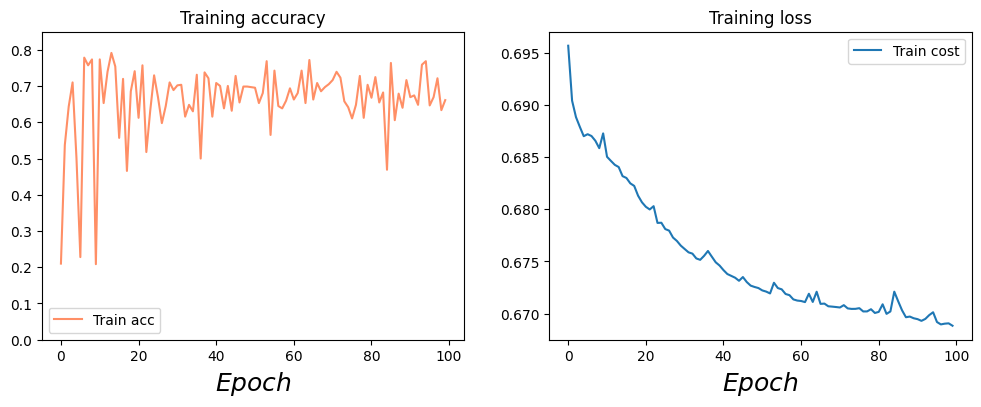

In [282]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(train_acc_epochs, color='orangered', alpha=0.6, label='Train acc')
axs[1].plot(train_cost_epochs, color='tab:blue', label='Train cost')
axs[0].set_xlabel(r"$Epoch$", fontsize=18)
axs[1].set_xlabel(r"$Epoch$", fontsize=18)
axs[0].set_title('Training accuracy')
axs[0].set_ylim(0.,0.85)
axs[1].set_title('Training loss')
axs[0].legend()
axs[1].legend()
plt.show()

In [284]:
preds = circuit(optimal_weights, Xtest01_flat)

In [285]:
estimated_labels = jnp.array([jnp.argmax(label) for label in preds])
estimated_labels

Array([1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0],      dtype=int64)

In [287]:
accuracy_score(ytest01, estimated_labels)

0.6318181818181818

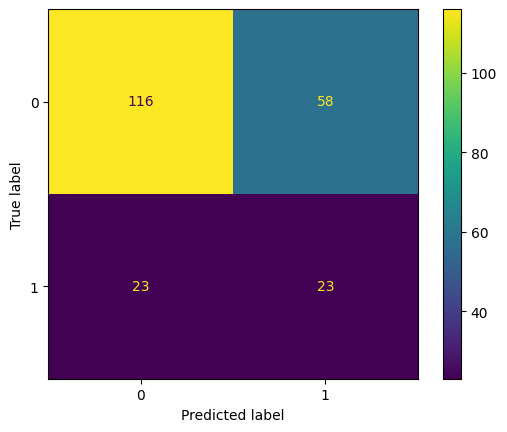

In [289]:
ConfusionMatrixDisplay(confusion_matrix(ytest01, estimated_labels)).plot()
plt.show()

In [191]:
n_epochs = 100
seed = 456

key = jax.random.PRNGKey(seed)
initial_params = jax.random.normal(key, shape=(48,))
np.random.seed(6)
weights = jnp.copy(initial_params)
batch_size = 32
# learning rate 
optimizer = optax.adam(learning_rate=0.01)
opt_state = optimizer.init(weights)
train_cost_epochs, train_acc_epochs = [], []

for step in range(n_epochs):
    idxs_dataset = jax.random.choice(key, jnp.arange(Xtrain01_flat.shape[0]), shape=(Xtrain01_flat.shape[0],), replace=False)
    key, subkey = jax.random.split(key)
    epoch_loss = 0.0
    epoch_accuracy = 0.0

    for i in range(0, Xtrain01_flat.shape[0], batch_size):
        idxs = idxs_dataset[i:i+batch_size]
        batch_features, batch_labels = Xtrain01_flat[idxs], ytrain01[idxs]

        # Update weights and compute loss per batch
        weights, opt_state, batch_loss = optimizer_update(opt_state, weights, batch_features, batch_labels)
        epoch_loss += batch_loss
        # Compute accuracy per batch
        batch_accuracy = accuracy(weights, batch_features, batch_labels)
        epoch_accuracy += batch_accuracy

    # Average loss and accuracy over batches for the epoch
    epoch_loss /= (Xtrain01_flat.shape[0] / batch_size)
    epoch_accuracy /= (Xtrain01_flat.shape[0] / batch_size)

    # Append epoch loss and accuracy to lists
    train_cost_epochs.append(epoch_loss)
    train_acc_epochs.append(epoch_accuracy)

    print(f"Epoch {step}:", "---Train loss:", epoch_loss, "---Train acc.:", epoch_accuracy)

# Save the optimal weights
optimal_weights = weights

Epoch 0: ---Train loss: 0.5981620766573817 ---Train acc.: 0.8333333333333334
Epoch 1: ---Train loss: 0.6013562244665661 ---Train acc.: 0.8262757871878392
Epoch 2: ---Train loss: 0.6046721373240099 ---Train acc.: 0.8192182410423453
Epoch 3: ---Train loss: 0.5966918305916807 ---Train acc.: 0.8333333333333334
Epoch 4: ---Train loss: 0.600514498138362 ---Train acc.: 0.8262757871878392
Epoch 5: ---Train loss: 0.5984462824364059 ---Train acc.: 0.8333333333333334
Epoch 6: ---Train loss: 0.5976705535645879 ---Train acc.: 0.8333333333333334
Epoch 7: ---Train loss: 0.5964413619512445 ---Train acc.: 0.8333333333333334
Epoch 8: ---Train loss: 0.6009641010134423 ---Train acc.: 0.8262757871878392
Epoch 9: ---Train loss: 0.5978208358382856 ---Train acc.: 0.8333333333333334
Epoch 10: ---Train loss: 0.6048218755277887 ---Train acc.: 0.8192182410423453
Epoch 11: ---Train loss: 0.5975651960049257 ---Train acc.: 0.8333333333333334
Epoch 12: ---Train loss: 0.5977906070874308 ---Train acc.: 0.83333333333333

KeyboardInterrupt: 

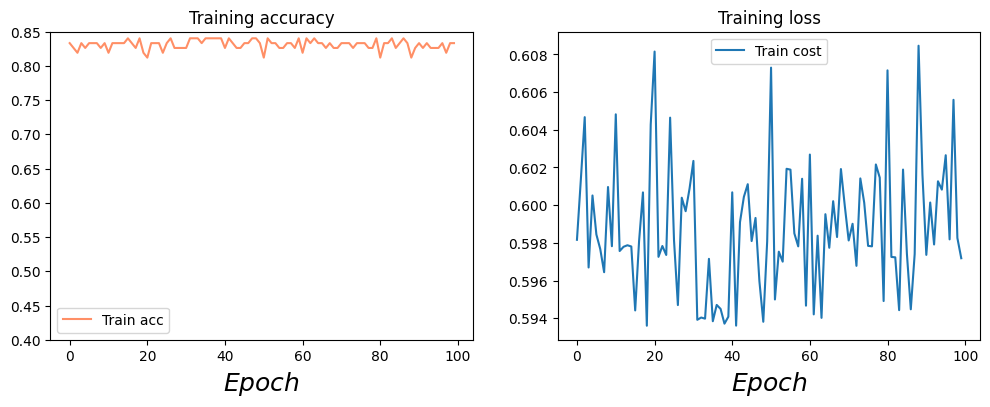

In [183]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
axs[0].plot(train_acc_epochs, color='orangered', alpha=0.6, label='Train acc')
axs[1].plot(train_cost_epochs, color='tab:blue', label='Train cost')
axs[0].set_xlabel(r"$Epoch$", fontsize=18)
axs[1].set_xlabel(r"$Epoch$", fontsize=18)
axs[0].set_title('Training accuracy')
axs[0].set_ylim(0.4,0.85)
axs[1].set_title('Training loss')
axs[0].legend()
axs[1].legend()
plt.show()

In [170]:
from load_data import RandomMnist
new_shape = 16
dataset = RandomMnist(classes_of_items=[0, 1], num_train_samples=500, shuffle=True, resize=new_shape, my_seed=999)
X_train, y_train, X_val, y_val = dataset.data()

In [173]:
n_epochs = 100
seed = 456

key = jax.random.PRNGKey(seed)
initial_params = jax.random.normal(key, shape=(76,))
np.random.seed(6)
weights = jnp.copy(initial_params)
batch_size = 32
# learning rate 
optimizer = optax.adam(learning_rate=0.001)
opt_state = optimizer.init(weights)
train_cost_epochs, train_acc_epochs = [], []

for step in range(n_epochs):
    idxs_dataset = jax.random.choice(key, jnp.arange(X_train.shape[0]), shape=(X_train.shape[0],), replace=False)
    key, subkey = jax.random.split(key)
    epoch_loss = 0.0
    epoch_accuracy = 0.0

    for i in range(0, X_train.shape[0], batch_size):
        idxs = idxs_dataset[i:i+batch_size]
        batch_features, batch_labels = X_train[idxs], y_train[idxs]

        # Update weights and compute loss per batch
        weights, opt_state, batch_loss = optimizer_update(opt_state, weights, batch_features, batch_labels)
        epoch_loss += batch_loss
        # Compute accuracy per batch
        batch_accuracy = accuracy(weights, batch_features, batch_labels)
        epoch_accuracy += batch_accuracy

    # Average loss and accuracy over batches for the epoch
    epoch_loss /= (X_train.shape[0] / batch_size)
    epoch_accuracy /= (X_train.shape[0] / batch_size)

    # Append epoch loss and accuracy to lists
    train_cost_epochs.append(epoch_loss)
    train_acc_epochs.append(epoch_accuracy)

    print(f"Epoch {step}:", "---Train loss:", epoch_loss, "---Train acc.:", epoch_accuracy)

# Save the optimal weights
optimal_weights = weights


Epoch 0: ---Train loss: 0.6988798701893494 ---Train acc.: 0.5325
Epoch 1: ---Train loss: 0.6973283092812623 ---Train acc.: 0.5375
Epoch 2: ---Train loss: 0.6960039519421302 ---Train acc.: 0.54
Epoch 3: ---Train loss: 0.6973367211870369 ---Train acc.: 0.535
Epoch 4: ---Train loss: 0.6963563432602043 ---Train acc.: 0.54
Epoch 5: ---Train loss: 0.6982627012506559 ---Train acc.: 0.5325
Epoch 6: ---Train loss: 0.6977840132286228 ---Train acc.: 0.535
Epoch 7: ---Train loss: 0.6983259513977792 ---Train acc.: 0.53
Epoch 8: ---Train loss: 0.6977950870421011 ---Train acc.: 0.535
Epoch 9: ---Train loss: 0.6976360310040433 ---Train acc.: 0.535
Epoch 10: ---Train loss: 0.6971804548126633 ---Train acc.: 0.5375
Epoch 11: ---Train loss: 0.6944671549979272 ---Train acc.: 0.545
Epoch 12: ---Train loss: 0.6979733600782813 ---Train acc.: 0.535
Epoch 13: ---Train loss: 0.6946092644180054 ---Train acc.: 0.5425
Epoch 14: ---Train loss: 0.6991908881400886 ---Train acc.: 0.5325
Epoch 15: ---Train loss: 0.69416